# Exploring data with Python - real world data

Last time, we looked at grades for our student data, and investigated this visually with histograms and box plots. Now we will look into more complex cases, describe the data more fully, and discuss how to make basic comparisons between data.

### Real world data distributions

Last time, we looked at grades for our student data, and estimated from this sample what the full population of grades might look like. Just to refresh, lets take a look at this data again.

Run the code below to print out the data and make a histogram + boxplot that show the grades for our sample of students.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request
from os.path import exists

In [13]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
filename = 'dataset/explore/grades.csv'
if not exists(filename):
    urllib.request.urlretrieve(url, filename)
else:
    print(f'{filename} file already present')

dataset/explore/grades.csv file already present


In [14]:
df_students = pd.read_csv(filename,delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


In [52]:
# Create a function that we can re-use
def show_distribution(var_data,title):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Min:'+str(round(min_val,2)))
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean:'+str(round(mean_val,2)))
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median:'+str(round(med_val,2)))
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode:'+str(round(mod_val,2)))
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Max:'+str(round(max_val,2)))
    ax[0].legend()

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle(f'Data Distribution of {title}')
    ax[0].legend()



Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



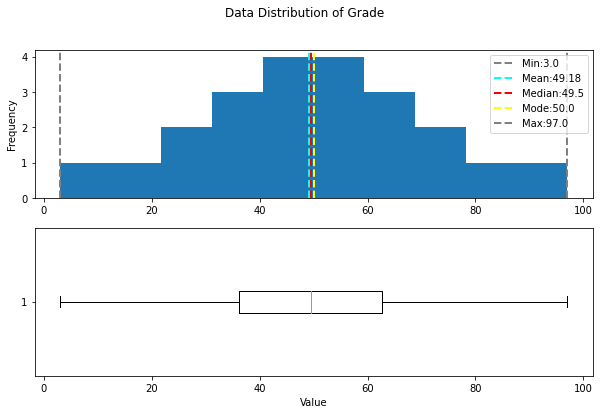

In [53]:
show_distribution(df_students['Grade'],title='Grade')

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



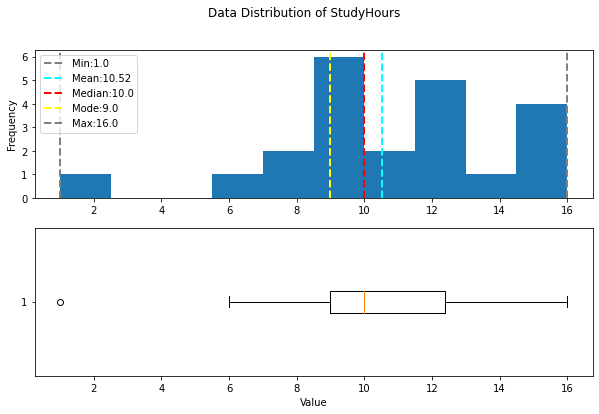

In [55]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col,'StudyHours')

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier - a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



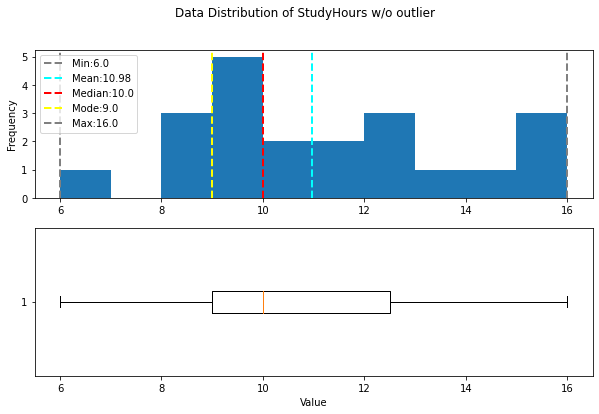

In [56]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col,'StudyHours w/o outlier')

For learning purposes we have just treated the value 1 is a true outlier here and excluded it. In the real world, though, it would be unusual to exclude data at the extremes without more justification when our sample size is so small. This is because the smaller our sample size, the more likely it is that our sampling is a bad representation of the whole population (here, the population means grades for all students, not just our 22). For example, if we sampled study time for another 1000 students, we might find that it's actually quite common to not study much!

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



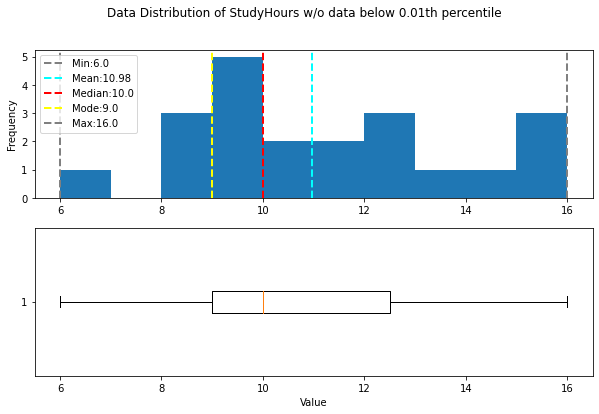

In [58]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col,'StudyHours w/o data below 0.01th percentile')